In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
with open("../options.txt", 'r') as f:
    options = f.readlines()
    options = {option.split("=")[0]: option.split("=")[1].strip() for option in options}

In [5]:
scenario_dir = options["hanoi_scenario_dir"]

def read_files_dataframe(scenario_dir):
    dfs = []
    print(scenario_dir)
    for subfolder in ["Demands", "Flows", "Pressures"]:
        for file in Path(scenario_dir).glob(f"{subfolder}/*.csv"):
            dfs.append(pd.read_csv(file, index_col=0, header=0, names=["Index", f"{subfolder}_{file.stem}"]))
    dfs = pd.concat(dfs, axis=1)
    index = pd.read_csv(f'{scenario_dir}/Timestamps.csv', index_col=0, header=0)
    dfs.index = index.Timestamp
    return dfs

df_1 = read_files_dataframe(scenario_dir)
df_1.head()

C:\Users\mjnst\Desktop\Thesis\Hanoi_CMH\Scenario-15


,Demands_Node_1,Demands_Node_10,Demands_Node_11,Demands_Node_12,Demands_Node_13,Demands_Node_14,Demands_Node_15,Demands_Node_16,Demands_Node_17,Demands_Node_18,...,Pressures_Node_3,Pressures_Node_30,Pressures_Node_31,Pressures_Node_32,Pressures_Node_4,Pressures_Node_5,Pressures_Node_6,Pressures_Node_7,Pressures_Node_8,Pressures_Node_9
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,-3236.4,86.4,104.4,97.2,151.2,93.6,46.8,64.8,194.4,201.6,...,68.797,67.556,67.595,67.673,68.647,68.559,68.336,68.254,68.216,68.188
2017-01-01 00:30:00,-2880.0,79.2,90.0,90.0,115.2,82.8,39.6,57.6,158.4,183.6,...,69.033,68.022,68.062,68.134,68.914,68.844,68.666,68.601,68.571,68.550
2017-01-01 01:00:00,-2563.2,79.2,79.2,90.0,108.0,72.0,32.4,50.4,140.4,147.6,...,69.221,68.411,68.439,68.490,69.123,69.065,68.917,68.862,68.837,68.819
2017-01-01 01:30:00,-2347.2,79.2,79.2,79.2,90.0,61.2,32.4,43.2,140.4,136.8,...,69.336,68.629,68.653,68.697,69.256,69.209,69.093,69.048,69.027,69.011
2017-01-01 02:00:00,-2174.4,72.0,68.4,68.4,79.2,64.8,28.8,50.4,129.6,133.2,...,69.423,68.805,68.825,68.863,69.356,69.316,69.214,69.174,69.157,69.143


Example of how to smooth

<AxesSubplot: xlabel='Timestamp'>

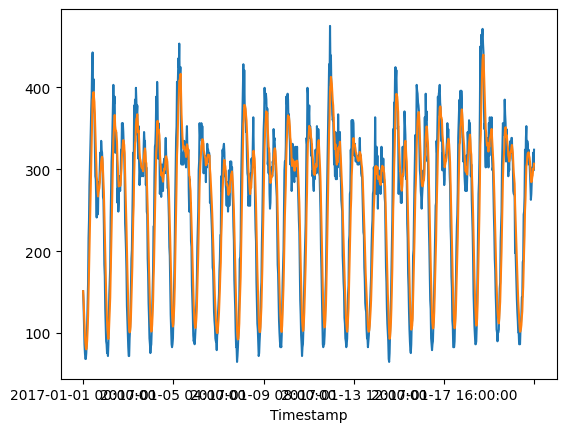

In [6]:
ax = df_1.Demands_Node_6.iloc[:1000].plot()
df_1.Demands_Node_6.iloc[:1000].ewm(span=6).mean().plot(ax=ax)